<a href="https://colab.research.google.com/github/Esmail97/ML-projects/blob/main/Mall_Customer_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('/content/Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


##Explore data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
#transform object data to numeric data
le = LabelEncoder()
data.Gender = le.fit_transform(data.Gender)
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


##Building model

In [6]:
clusters = []
j = []

In [7]:
for i in range(1,12):
  model = KMeans(n_clusters=i)
  model.fit(data)
  clusters.append(i)
  j.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [8]:
new = pd.DataFrame( j, clusters)
new

,0
1,975512.060000
2,387065.713771
3,271396.562966
4,195401.198560
5,157519.231572
6,122628.062406
7,103254.377018
8,86053.674448
9,77498.149481
10,69026.847513


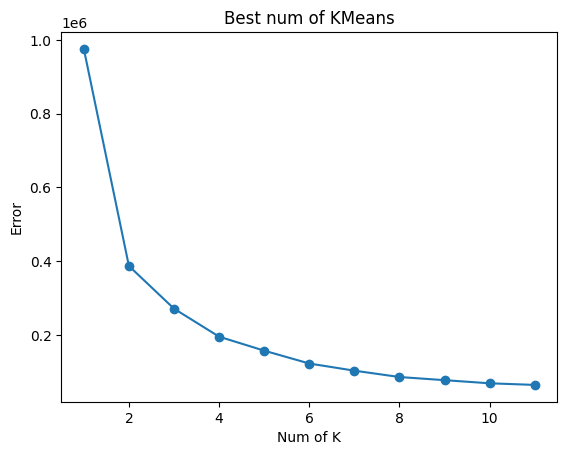

In [9]:
plt.plot(clusters,j,marker='o')
plt.title('Best num of KMeans')
plt.xlabel('Num of K')
plt.ylabel('Error')
plt.show()

In [11]:
model = KMeans(n_clusters=4)
model.fit(data)
pre = model.predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
#create new col contains num of cluster
data['K_mean'] = pre
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),K_mean
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1
...,...,...,...,...,...,...
195,196,0,35,120,79,2
196,197,0,45,126,28,0
197,198,1,32,126,74,2
198,199,1,32,137,18,0


In [13]:
df0 = data[data['K_mean']==0]
df1 = data[data['K_mean']==1]
df2 = data[data['K_mean']==2]
df3 = data[data['K_mean']==3]

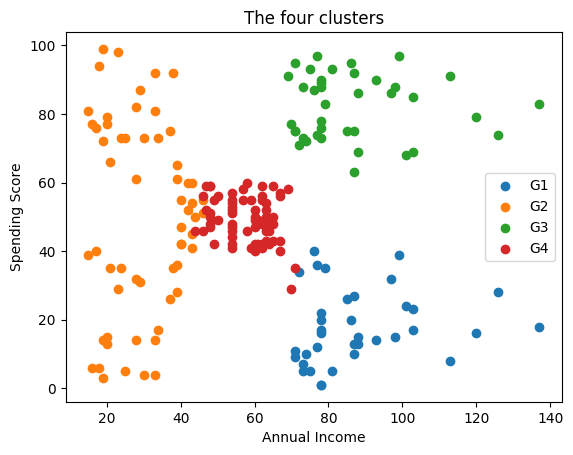

In [14]:
plt.scatter(df0['Annual Income (k$)'],df0['Spending Score (1-100)'],label ='G1')
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],label ='G2')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],label ='G3')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],label ='G4')
plt.title('The four clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

##Data Analysis

In [24]:
data.K_mean.value_counts()

3    66
1    59
2    39
0    36
Name: K_mean, dtype: int64

<Axes: xlabel='K_mean', ylabel='count'>

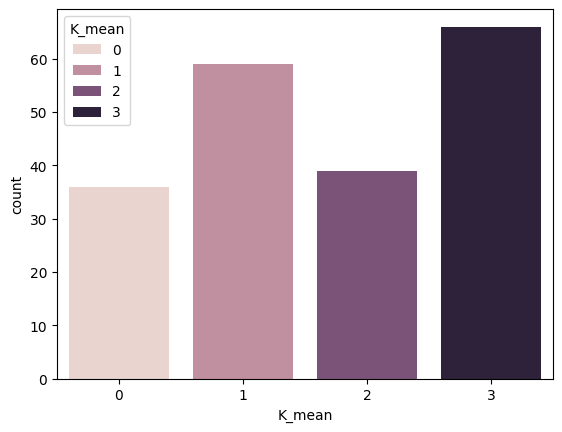

In [21]:
sns.countplot(data , x ='K_mean',hue = 'K_mean')

<Axes: ylabel='K_mean'>

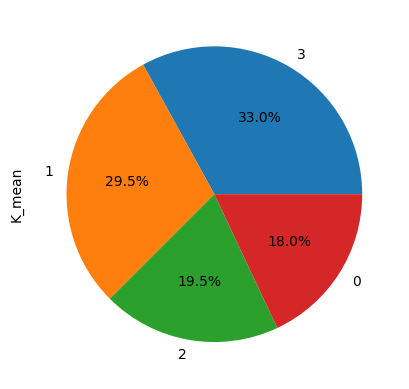

In [27]:
data.K_mean.value_counts().plot.pie(autopct= '%0.1f%%')

<Axes: xlabel='K_mean', ylabel='Spending Score (1-100)'>

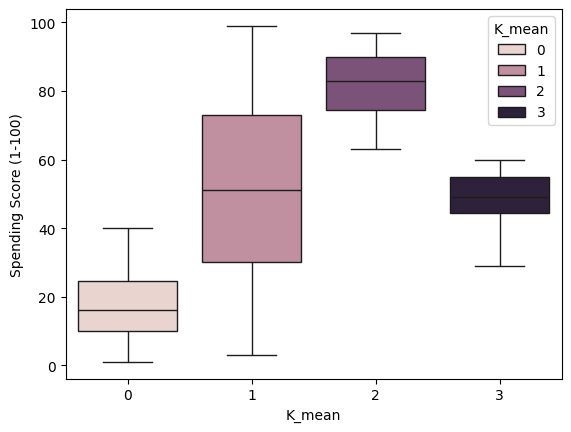

In [32]:
sns.boxplot( x=data.K_mean,y=data['Spending Score (1-100)'],hue=data.K_mean)